## Blatt 06, Aufg 04

In [3]:
import numpy as np
from skimage.io import imread
from matplotlib import pyplot as plt
import math
import time

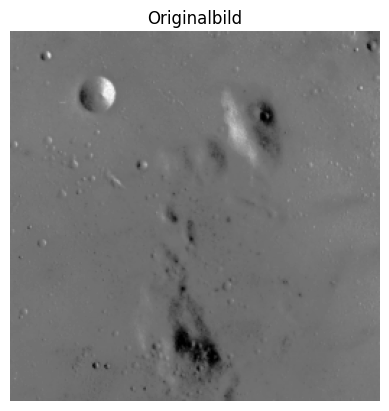

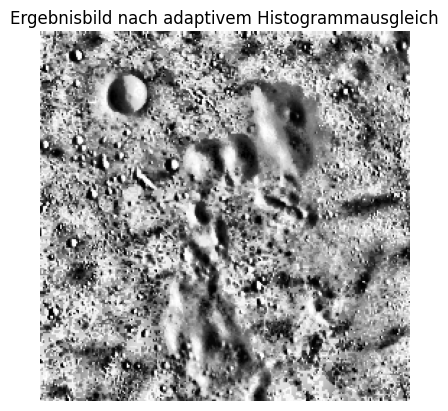

In [4]:


def adaptive_histogram_equalization(image, n):
    # Berechnung der Bildgröße
    height, width = image.shape
    
    # Erstellen eines leeren Ausgabebildes
    equalized_image = np.zeros_like(image)
    
    # Iteration über das gesamte Bild
    for i in range(height):
        for j in range(width):
            # Berechnung des Nachbarschaftsbereichs
            min_row = max(0, i - n // 2)
            max_row = min(height - 1, i + n // 2)
            min_col = max(0, j - n // 2)
            max_col = min(width - 1, j + n // 2)
            
            # Extraktion der Nachbarschaftspixel
            neighborhood = image[min_row:max_row+1, min_col:max_col+1]
            
            # Berechnung des Histogramms der Nachbarschaft
            hist, bins = np.histogram(neighborhood.flatten(), bins=256, range=[0, 256], density=True)
            
            # Berechnung der kumulativen Verteilungsfunktion (CDF)
            cdf = hist.cumsum()
            
            # Berechnung der Transformationsfunktion T(n)
            T = (cdf * 255).astype(np.uint8)
            
            # Anwendung der Transformationsfunktion auf das Pixel
            equalized_pixel = T[image[i, j]]
            
            # Aktualisierung des Ausgabebildes
            equalized_image[i, j] = equalized_pixel
    
    return equalized_image

# Laden des Bildes
image = imread('./bilder-Wk06/moon.png')


# Parameter für den adaptiven Histogrammausgleich
n = 43

# Durchführung des adaptiven Histogrammausgleichs
equalized_image = adaptive_histogram_equalization(image, n)

# Plotting des Originalbildes
plt.figure()
plt.imshow(image, cmap='gray')
plt.title("Originalbild")
plt.axis('off')
plt.show()

# Plotting des Ergebnisbildes nach dem adaptiven Histogrammausgleich
plt.figure()
plt.imshow(equalized_image, cmap='gray')
plt.title("Ergebnisbild nach adaptivem Histogrammausgleich")
plt.axis('off')
plt.show()
